# Základní propojení

In [11]:
"""
!pip install fxcmpy==1.2.6
!pip install python-socketio==4.4
!pip install python-engineio==3.9
!pip install websocket-client==1.1.0
"""
#funkční verze instalačky

'\n!pip install fxcmpy==1.2.6\n!pip install python-socketio==4.4\n!pip install python-engineio==3.9\n!pip install websocket-client==1.1.0\n'

In [1]:
#potřebné importy
import fxcmpy
import socketio
import engineio
import websocket

In [74]:
TOKEN = 'a19787f3f6fe3eb4ffa3f06f7808c7073b49f375' #můj token -> přes soubor

In [9]:
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error',proxy_port=443) #připojení napřímo
print("I am connected huraay")

I am connected huraay


In [11]:
#con.close() #zavření připojení
print("I am closing my connection")

I am closing my connection


In [8]:
#con = fxcmpy.fxcmpy(config_file='fxcm.cfg') - nefunguje mi skrze CFG soubor [ZATÍM NEŘEŠIT]

# Prvotní funkce

In [10]:
print(con.get_instruments()) # všechny instrumenkty, které jsou dostupné

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'VOLX', 'USDOLLAR', 'US2000', 'INDIA50', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'USOilSpot', 'UKOilSpot', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'ESPORTS', 'BIOTECH', 'CANNABIS', 'FAANG', 'CHN.TECH', 'CHN.ECOMM', 'USEquities', 'AIRLINES', 'CASINOS', 'TRAVEL', 'US.ECOMM', 'US.BANKS', 'US.AUTO', 'WFH', 'ATMX', 'URANIUM', 'Cryptostock', 'BA.us', 'BAC.us', 'BRKB.us', 'C.us', 'CRM.us', 'DIS.us', 'F.us', 'JPM

In [13]:
data = con.get_candles('EUR/USD', period='m1', number=250) #dolujeme si ceny candle ceny pro eurusd - posledních 250 minut :)
data.tail() #tail = konec tzn. 250m -> 1 řádek je před 250 minutami, poslední je poslední minuta

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2022-01-07 11:54:00,1.13040,1.13046,1.13048,1.13039,1.13050,1.13058,1.13060,1.13050,90
2022-01-07 11:55:00,1.13046,1.13052,1.13075,1.13030,1.13059,1.13062,1.13086,1.13042,246
2022-01-07 11:56:00,1.13051,1.13021,1.13052,1.13020,1.13062,1.13034,1.13062,1.13032,92
2022-01-07 11:57:00,1.13022,1.13033,1.13034,1.13019,1.13034,1.13044,1.13045,1.13031,54
2022-01-07 11:58:00,1.13033,1.13024,1.13035,1.13020,1.13045,1.13034,1.13046,1.13032,146


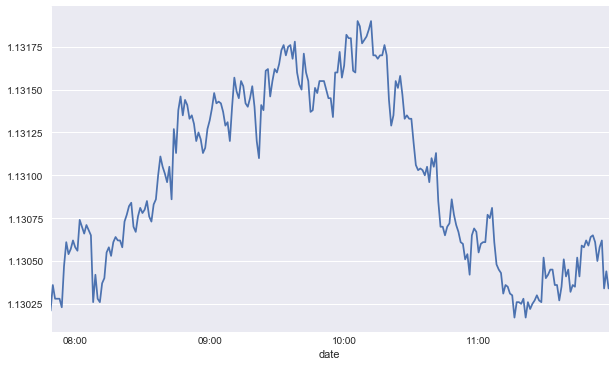

In [14]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline
data['askclose'].plot(figsize=(10, 6)) #jen tiskneme data -> zatím netřeba hrotit

In [16]:
con.is_connected() #OVĚŘENÍ ZDA JSEM PŘIPOJENÝ -> DŮLEŽITÉ! KMOD VŽDY ZAČNE OVĚŘENÍM PŘIPOJENÍ 

True

In [17]:
con.get_account_ids() #moje id --> teoreticky budu mít více účtů -> ALE asi lepší server = účet?? Kdo ví

[877149]

In [18]:
con.get_default_account() #první account id = defaultní lze poté přepínat na jiné

877149

In [19]:
con.set_default_account(877149) #mám jen jeden účet takže dávám default již na default

In [20]:
con.get_order_ids() #idčka objednávek - důležité pro tracking!!  teď žádné nemám

[]

In [24]:
con.get_instruments_for_candles()[::20] #jen co vše má candle data -> každý 20tý -> máme jich hafec

['AUD/CAD',
 'EUR/SEK',
 'SOYF',
 'ZAR/JPY',
 'US.ECOMM',
 'SE.us',
 'AIR.fr',
 'DBK.de',
 'IAG.uk',
 'SHOP.us',
 'WOW.au',
 'NWG.uk',
 'PDD.us',
 'ABNB.us',
 'GALA.hk']

In [34]:
import datetime as dt #modul pro čas
start = dt.datetime(2021,6,1)  #začátek odbodbí za kdy chci data
stop = dt.datetime(2021,12,31) #konec období za kdy chci data
con.get_candles('USD/JPY', period='D1', start = start, stop=stop) #canlde data 

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2021-06-02 21:00:00,109.461,109.513,109.878,109.382,109.512,109.599,109.890,109.437,113320
2021-06-03 21:00:00,109.513,110.253,110.314,109.510,109.599,110.327,110.329,109.566,119603
2021-06-04 21:00:00,110.253,109.475,110.323,109.359,110.327,109.575,110.341,109.371,137076
2021-06-06 21:00:00,109.475,109.580,109.580,109.574,109.575,109.639,109.645,109.639,2
2021-06-07 21:00:00,109.580,109.232,109.631,109.182,109.639,109.275,109.645,109.195,109195
...,...,...,...,...,...,...,...,...,...
2021-12-27 22:00:00,114.315,114.853,114.907,114.304,114.444,114.904,114.921,114.319,71898
2021-12-28 22:00:00,114.853,114.805,114.943,114.701,114.904,114.840,114.956,114.714,82860
2021-12-29 22:00:00,114.805,114.930,115.032,114.662,114.840,114.974,115.045,114.674,107166


In [36]:
con.get_candles('USD/JPY', period='D1', number=170) #pomocí number vydoluji data co potřebuji :) -> 
#dobré pokud řeším signál dle snadných indikátorů -> stále stejné fixní číslo

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2021-06-17 21:00:00,110.704,110.158,110.818,110.158,110.720,110.245,110.829,110.173,164280
2021-06-18 21:00:00,110.158,110.203,110.478,109.935,110.245,110.243,110.491,109.948,164006
2021-06-21 21:00:00,110.203,110.293,110.348,109.709,110.243,110.349,110.360,109.722,175387
2021-06-22 21:00:00,110.293,110.602,110.787,110.205,110.349,110.697,110.799,110.218,121143
2021-06-23 21:00:00,110.602,110.946,111.100,110.572,110.697,110.966,111.112,110.631,131414
...,...,...,...,...,...,...,...,...,...
2022-01-03 22:00:00,115.085,115.287,115.361,114.940,115.170,115.377,115.377,114.954,103770
2022-01-04 22:00:00,115.291,116.112,116.346,115.267,115.361,116.202,116.358,115.298,147659
2022-01-05 22:00:00,116.121,116.063,116.237,115.615,116.175,116.162,116.250,115.627,150236


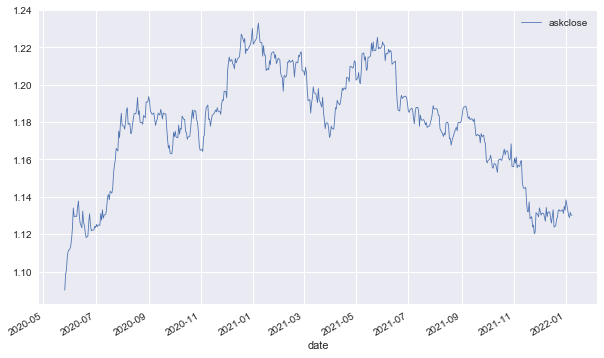

In [43]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline
data = con.get_candles('EUR/USD', period='D1',
                       columns=['askclose'], number=500)

data.plot(figsize=(10, 6), lw=0.8);
#eurusd za 500 posledních dní :)

## Real time data

In [54]:
con.subscribe_market_data('EUR/USD') #musím v podstatě subscriptnou abych mohl mít rt data

In [46]:
con.get_subscribed_symbols() # jen ukáže co mám sub..

['EUR/USD']

In [47]:
con.is_subscribed('EUR/USD') #klasika

True

In [52]:
con.get_prices('EUR/USD').tail() #dává aktuální data v tomto oklamžiku - mikro rozdíly :D

,Bid,Ask,High,Low
2022-01-07 12:22:42.152,1.12989,1.13000,1.13198,1.12894
2022-01-07 12:22:43.028,1.12989,1.12999,1.13198,1.12894
2022-01-07 12:22:43.949,1.12988,1.12999,1.13198,1.12894
2022-01-07 12:22:50.786,1.12989,1.13001,1.13198,1.12894
2022-01-07 12:22:51.767,1.12988,1.13000,1.13198,1.12894


In [56]:
con.unsubscribe_market_data('EUR/USD') #jen že už nechci  

# Data tables

In [59]:
con.get_accounts().T #informace o účtu - tak nějak nezbytnost pro money management

,0
t,6
ratePrecision,0
accountId,877149
balance,50000
usdMr,0
mc,N
mcDate,
accountName,00877149
usdMr3,0
hedging,Y


In [61]:
con.get_offers(kind='dataframe').head() #prostě jan aktuální nabídky ..

,t,ratePrecision,offerId,rollB,rollS,fractionDigits,pip,defaultSortOrder,currency,instrumentType,...,volume,pipFraction,spread,mmr,emr,lmr,minQuantity,maxQuantity,instrBaseUnitSize,pipCost
0,0,3,2,0.0000,0.0000,3,0.0100,950,USD/JPY,1,...,0.00637,0.1,1.2,29.97,29.97,14.985,1,50000000,1,0.06377
1,0,5,3,0.0148,-0.0361,5,0.0001,250,GBP/USD,1,...,1.00000,0.1,1.6,33.30,33.30,16.650,1,50000000,1,0.07384
2,0,5,4,0.1114,-0.2486,5,0.0001,1250,USD/CHF,1,...,0.80008,0.1,1.3,29.97,29.97,14.985,1,50000000,1,0.08005
3,0,5,5,0.0258,-0.0863,5,0.0001,1450,EUR/CHF,1,...,0.80008,0.1,2.9,33.30,33.30,16.650,1,50000000,1,0.08005
4,0,5,6,-0.0184,0.0037,5,0.0001,1350,AUD/USD,1,...,0.73788,0.1,1.7,30.00,30.00,15.000,1,50000000,1,0.07384


In [62]:
con.get_open_positions(kind='list') #aktuálně otevřené pozice ..žádné :D

[]

In [63]:
con.get_closed_positions(kind='dataframe').T #překvapivě

""


In [64]:
con.get_orders().T #otevřené pozice ..žádné :)

""


In [67]:
con.get_open_positions_summary().T #jen souhr jak si daří více pozic naráz

,0
t,1
ratePrecision,0
tradeId,
accountName,
accountId,
roll,0
com,0
open,0
valueDate,
grossPL,0


In [68]:
#netřeba pořád opakovat
#con.get_closed_positions_summary().T 
#con.get_accounts_summary().T
#con.get_summary().T

# POKLÁDÁNÍ OBJEDNÁVEK

In [69]:
#otevřené ob = con.get_open_positions().T

In [70]:
#jednoduchá tvorba ob
#order = con.create_market_sell_order('EUR/USD', 100)
#order = con.create_market_buy_order('USD/JPY', 200)

In [71]:
"""order = con.open_trade(symbol='USD/JPY', is_buy=True,
                       rate=105, is_in_pips=False,
                       amount='1000', time_in_force='GTC',
                       order_type='AtMarket', limit=120)"""
#PROČÍST DOKUMENTACE PRO ZAPSÁNÍ ...SYSTÉM NA VÝPOČET PIPŮ APOD. -> TOHLE UŽ CHCE MÍT VYLADĚNÉ 

"order = con.open_trade(symbol='USD/JPY', is_buy=True,\n                       rate=105, is_in_pips=False,\n                       amount='1000', time_in_force='GTC',\n                       order_type='AtMarket', limit=120)"

ZAVÍRAT OB DLE ID!

In [72]:
#con.get_open_positions().T
#con.get_open_positions()['tradeId']
#con.get_open_trade_ids()
#con.get_all_trade_ids()
#tradeId = con.get_open_trade_ids()[-1]
#con.change_trade_stop_limit(tradeId, is_in_pips=False,
#                            is_stop=False, rate=115)
#
#con.get_open_positions().T
#con.close_trade(trade_id=tradeId, amount=1000)
#con.close_all_for_symbol('EUR/USD')

https://www.fxcm.com/fxcmpy/06_entry_orders.html - ENTRY ORDER -> MOC NECHÁPU K ČEMU :)

# THE END...lest begin